In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install --upgrade keras

In [ ]:
!pip install tensorflow

In [ ]:
pip install keras_preprocessing

In [1]:
!pip install transformers

In [2]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 123.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


# Kütüphanelerin Yüklenmesi

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from warnings import filterwarnings
from collections import Counter
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU, Bidirectional,SpatialDropout1D,SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, log_loss, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [4]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# nltk stopwords ve lemmatizer için
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
df=pd.read_csv('e-ticaret.csv')

In [ ]:
df.head()

,comments,ticket
0,ürünün paketlenmesini çok beğendim sağlam soru...,"Tavsiye Edilen, Kaliteli Ürünler"
1,"Tavsiye üzerine aldım , hediye aldım anneme , ...","Paketleme Iyi,Hizli Teslimat"
2,motorla boru kısmın birleştiği yer tam oturmuy...,Fiyat Performans
3,Paketleme güzel baya özenle hazırlanmış:),"Paketleme Iyi,Hizli Teslimat"
4,TORBASIZ DİYE KOSKOCA YAZIP TORBALI ÜRÜN YOLLA...,Iade Edilen


In [ ]:
df.size

88014

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44007 entries, 0 to 44006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  44007 non-null  object
 1   ticket    44007 non-null  object
dtypes: object(2)
memory usage: 687.7+ KB


In [ ]:
df.describe()

,comments,ticket
count,44007,44007
unique,36944,16
top,Güzel ürün beğendim,"Tavsiye Edilen, Kaliteli Ürünler"
freq,33,14853


In [ ]:
df.isnull().sum()

,0
comments,0
ticket,0


In [ ]:
print(df['ticket'].unique())

['Tavsiye Edilen, Kaliteli Ürünler' 'Paketleme Iyi,Hizli Teslimat'
 'Fiyat Performans' 'Iade Edilen' 'Kalitesiz,Kusurlu, Kötü Paketleme' '1'
 '5' ' güzeldi' 'yorumlara&nbsp' '4' '2'
 ' az kişi çalışıyoruz olur böyle şeyler tavrına-pişkinliğine bürünmesi !'
 ' defter kaplamak için kullanılan buzlu bir yapısı var… halbuki parlak mı diye sorarak almıştık… iade etmedik fiyat uygundu çünkü…'
 '3' ' iade etmek zorundayım. Kumaşları güzel.' '3 kendi bedeninizi alın']


In [10]:
# Beklenen doğru kategoriler
valid_categories = ['Paketleme Iyi,Hizli Teslimat', 'Fiyat Performans', 'Iade Edilen','Kalitesiz,Kusurlu, Kötü Paketleme', 'Tavsiye Edilen, Kaliteli Ürünler']

# Bu kategorilere uymayanları filtreleyerek NaN yapma
df['ticket'] = df['ticket'].apply(lambda x: x if x in valid_categories else 'NaN')

# NaN olan satırları düşürme
df = df[df['ticket'] != 'NaN']

# Keşifsel Veri Analizi(EDA)

In [ ]:
ticket_counts = df['ticket'].value_counts()

In [ ]:
ticket_counts

,count
ticket,
"Tavsiye Edilen, Kaliteli Ürünler",14853
"Kalitesiz,Kusurlu, Kötü Paketleme",12385
"Paketleme Iyi,Hizli Teslimat",6002
Iade Edilen,5495
Fiyat Performans,5231


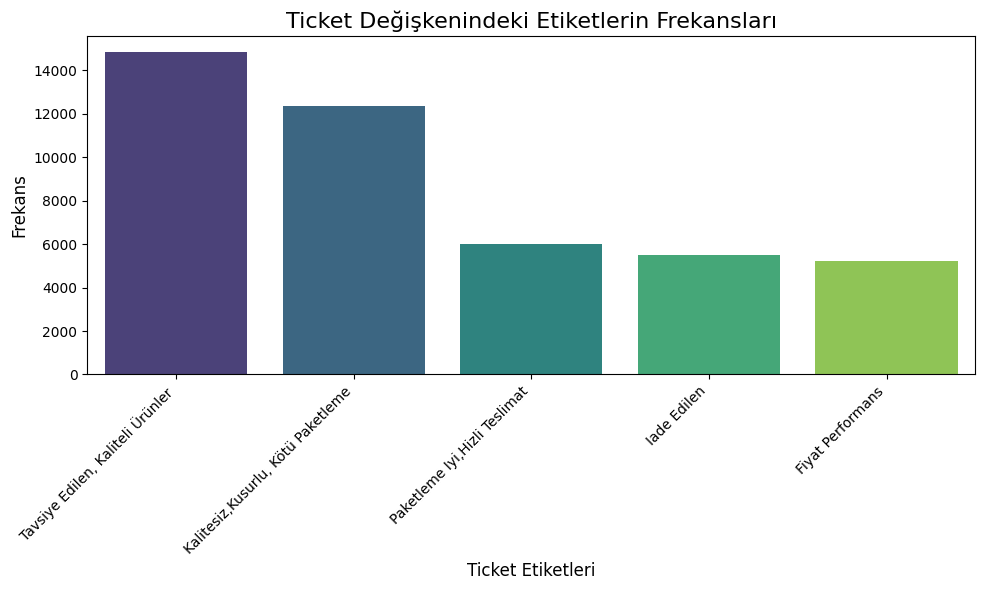

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_counts.index, y=ticket_counts.values, palette='viridis')
plt.title('Ticket Değişkenindeki Etiketlerin Frekansları', fontsize=16)
plt.xlabel('Ticket Etiketleri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df["comments"].head()

,comments
0,ürünün paketlenmesini çok beğendim sağlam soru...
1,"Tavsiye üzerine aldım , hediye aldım anneme , ..."
2,motorla boru kısmın birleştiği yer tam oturmuy...
3,Paketleme güzel baya özenle hazırlanmış:)
4,TORBASIZ DİYE KOSKOCA YAZIP TORBALI ÜRÜN YOLLA...


In [ ]:
# Tüm yorumları birleştirip kelime frekanslarını sayma
all_words = ' '.join(df['comments']).split()

# Kelime frekanslarını hesaplama
word_freq = Counter(all_words)

# En sık geçen kelimeler
most_common_words = word_freq.most_common()

word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

In [ ]:
word_freq_df.head(10)

,Word,Frequency
0,çok,22204
1,güzel,12057
2,bir,10368
3,ve,10216
4,ürün,8357
5,geldi,7724
6,iade,7158
7,ama,7121
8,için,5604
9,ederim,5560


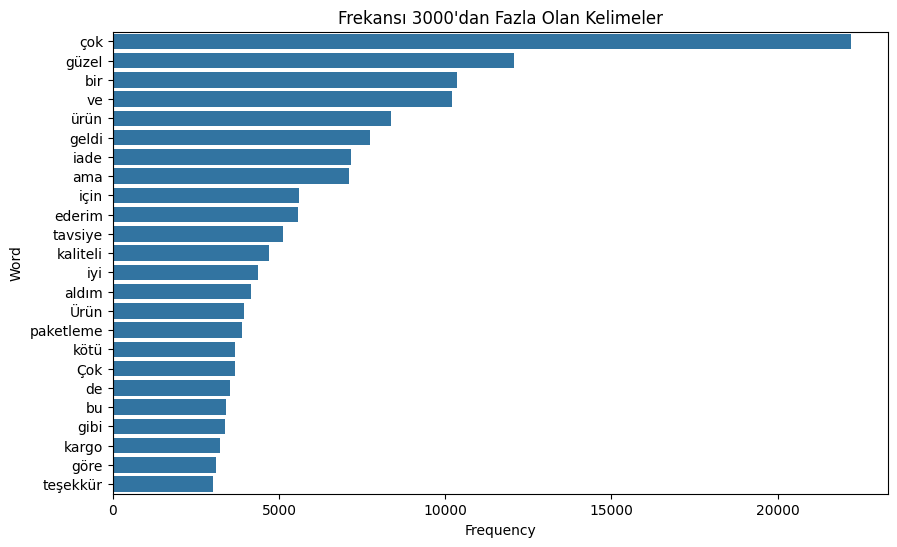

In [ ]:
threshold = 3000
filtered_words = word_freq_df[word_freq_df['Frequency'] > threshold]

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=filtered_words)
plt.title(f'Frekansı {threshold}\'dan Fazla Olan Kelimeler')
plt.show()

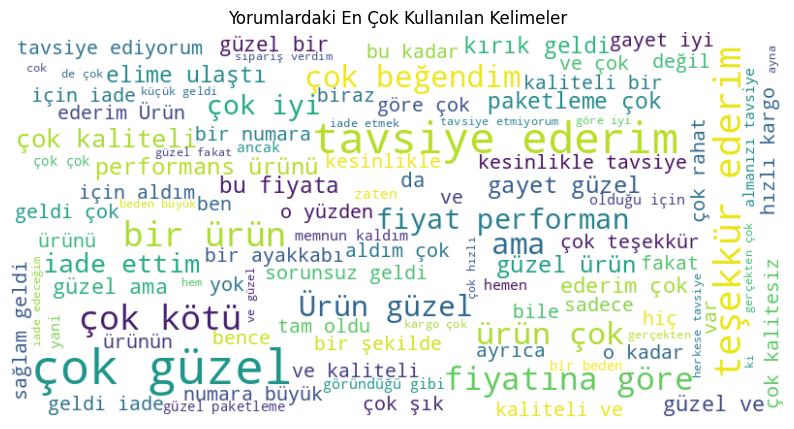

In [ ]:
# Yorumları birleştiriyorum
all_comments = ' '.join(df['comments'])

# WordCloud oluşturma
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,width=800, height=400, background_color='white').generate(all_comments)

# WordCloud görselleştirme
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Yorumlardaki En Çok Kullanılan Kelimeler")
plt.show()

# Veri Ön İşleme

In [12]:
def clean_text(text):

    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('turkish'))

    text = ' '.join([word for word in text.split() if word not in stop_words])

    lemmatizer = WordNetLemmatizer()

    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [13]:
# Yorumları temizleme
df['cleaned_comments'] = df['comments'].apply(clean_text)

# Modelleme

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['cleaned_comments']).toarray()

y = df['ticket'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)

(35172,)


## Lojistik Regresyon

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# çapraz doğrulama ile accuracy
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
log_reg_accuracy = cross_val_score(log_reg, X, y, cv=kfold, scoring='accuracy').mean()

In [ ]:
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

In [ ]:
log_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
})

In [ ]:
log_metrics_df

,Metric,Score
0,Accuracy,0.80
1,Precision,0.80
2,Recall,0.80
3,F1 Score,0.80


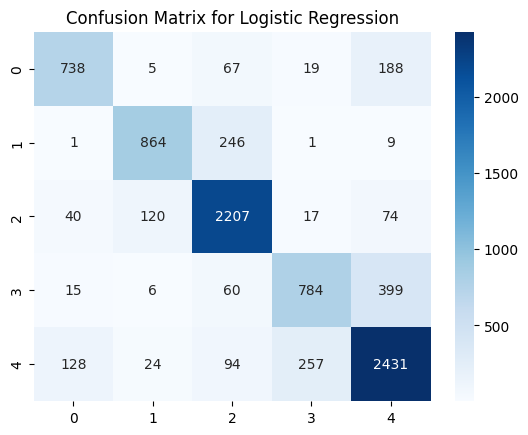

In [ ]:
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
"""import joblib

joblib.dump(log_reg, 'logistic_regression_model.pkl')

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')"""

['tfidf_vectorizer.pkl']

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_model_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_model_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_model_f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [ ]:
rf_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [rf_accuracy, rf_model_precision, rf_model_recall, rf_model_f1]
})

In [ ]:
rf_metrics_df

,Metric,Score
0,Accuracy,0.79
1,Precision,0.79
2,Recall,0.79
3,F1 Score,0.79


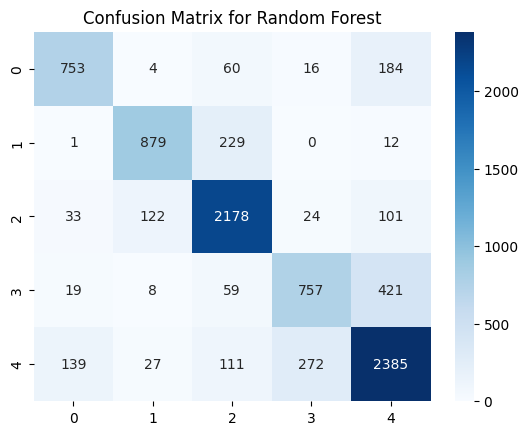

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

## LSTM Model

In [ ]:
X_raw = df['cleaned_comments']
y = df['ticket']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
"""# LabelEncoder'ı kaydetme
joblib.dump(label_encoder, 'label_encoder.pkl')"""

['label_encoder.pkl']

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X_train_raw)

X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

# Verileri aynı uzunlukta yapmak için padding
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [ ]:
# LSTM modeli
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitme
history=lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 231ms/step - accuracy: 0.8806 - loss: 0.3053 - val_accuracy: 0.8048 - val_loss: 0.5348
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 230ms/step - accuracy: 0.8866 - loss: 0.2858 - val_accuracy: 0.8058 - val_loss: 0.5686
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 231ms/step - accuracy: 0.8986 - loss: 0.2656 - val_accuracy: 0.8010 - val_loss: 0.5843
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 230ms/step - accuracy: 0.9010 - loss: 0.2527 - val_accuracy: 0.7970 - val_loss: 0.6111
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 230ms/step - accuracy: 0.9068 - loss: 0.2365 - val_accuracy: 0.7905 - val_loss: 0.6607


In [ ]:
y_pred_lstm = lstm_model.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step


In [ ]:
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_precision = precision_score(y_test, y_pred_lstm, average='weighted')
lstm_recall = recall_score(y_test, y_pred_lstm, average='weighted')
lstm_f1 = f1_score(y_test, y_pred_lstm, average='weighted')
lstm_log_loss = log_loss(y_test, lstm_model.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step


In [ ]:
# Metrikleri bir DataFrame'e ekle
lstm_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1, lstm_log_loss]
    })

In [ ]:
lstm_metrics_df

,Metric,Score
0,Accuracy,0.79
1,Precision,0.79
2,Recall,0.79
3,F1 Score,0.79
4,Log Loss,0.66


275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step


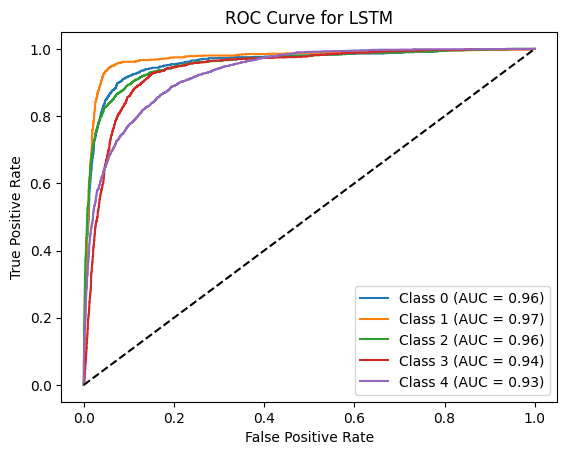

In [ ]:
# ROC curve
lb = LabelBinarizer()
lb.fit(y_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], lstm_model.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for LSTM")
plt.legend()
plt.show()

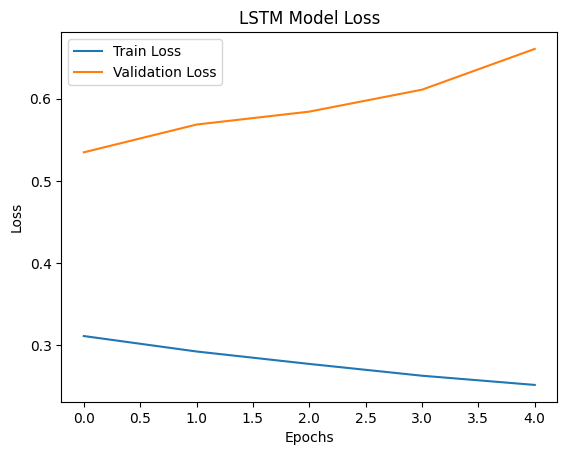

In [ ]:
# Kayıp (Loss) Grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

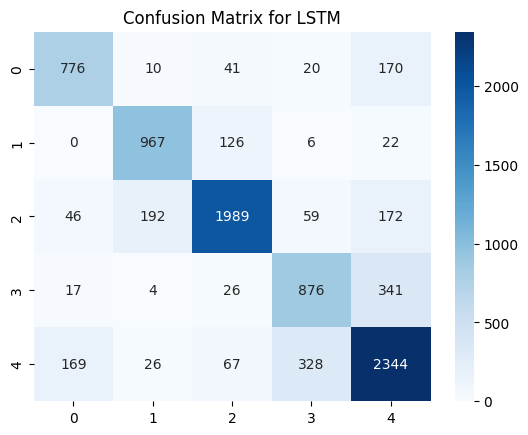

In [ ]:
cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for LSTM")
plt.show()

In [ ]:
"""# LSTM modelini kaydetme
lstm_model.save('lstm_model.keras')"""

In [ ]:
"""joblib.dump(tokenizer, 'tokenizer.pkl')"""

['tokenizer.pkl']

## CNN Model

In [ ]:
# CNN Modeli
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000,output_dim=128, input_length=200))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_cnn=cnn_model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.4185 - loss: 1.4119 - val_accuracy: 0.5020 - val_loss: 1.1815
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5283 - loss: 1.1287 - val_accuracy: 0.5545 - val_loss: 1.1011
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6090 - loss: 0.9810 - val_accuracy: 0.5685 - val_loss: 1.0907
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6462 - loss: 0.8954 - val_accuracy: 0.5754 - val_loss: 1.0810
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6852 - loss: 0.8081 - val_accuracy: 0.5696 - val_loss: 1.1506
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7034 - loss: 0.7533 - val_accuracy: 0.5679 - val_loss: 1.1987
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7324 - loss: 0.6936 - val_accuracy: 0.5652 - val_loss: 1.3089
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7441 - loss: 0.6624 - val_accuracy: 

In [ ]:
y_pred_cnn = cnn_model.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
cnn_precision = precision_score(y_test, y_pred_cnn, average='weighted')
cnn_recall = recall_score(y_test, y_pred_cnn, average='weighted')
cnn_f1 = f1_score(y_test, y_pred_cnn, average='weighted')
cnn_log_loss = log_loss(y_test, cnn_model.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
cnn_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1, cnn_log_loss]
})

In [ ]:
cnn_metrics_df

,Metric,Score
0,Accuracy,0.56
1,Precision,0.57
2,Recall,0.56
3,F1 Score,0.55
4,Log Loss,1.48


275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


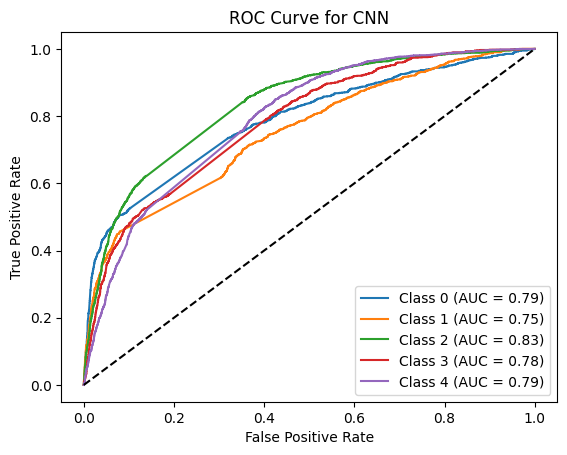

In [ ]:
# ROC curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], cnn_model.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for CNN")
plt.legend()
plt.show()

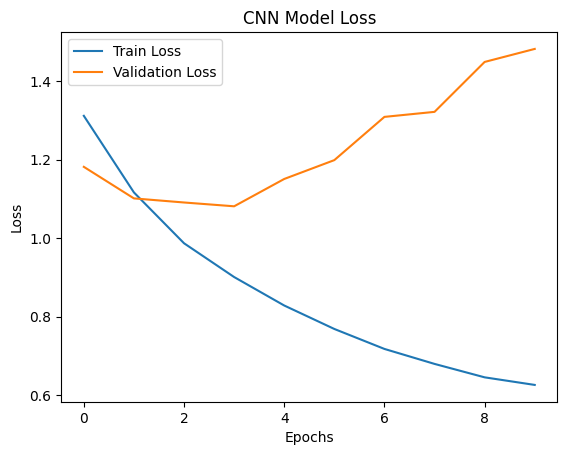

In [ ]:
# Loss grafiği
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

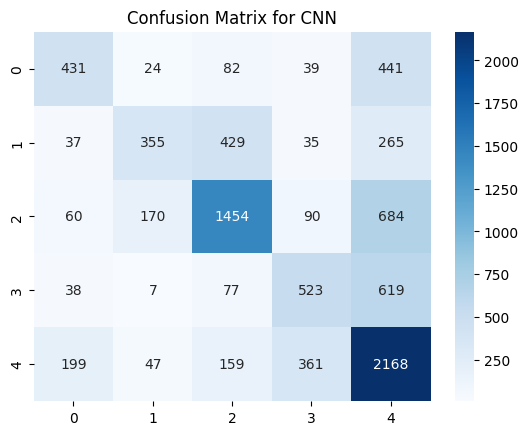

In [ ]:
cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for CNN")
plt.show()

## Katman Sayısı Düzenlenmiş CNN

In [ ]:
# 2-CNN Modeli
cnn_model2 = Sequential()
cnn_model2.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
cnn_model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model2.add(MaxPooling1D(pool_size=2))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units=128, activation='relu'))
cnn_model2.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

In [ ]:
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_cnn2 = cnn_model2.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6317 - loss: 0.9240 - val_accuracy: 0.8115 - val_loss: 0.4806
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.4156 - val_accuracy: 0.8137 - val_loss: 0.4951
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3333 - val_accuracy: 0.8133 - val_loss: 0.5275
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8943 - loss: 0.2716 - val_accuracy: 0.8052 - val_loss: 0.5655
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.2168 - val_accuracy: 0.7990 - val_loss: 0.6794


In [ ]:
y_pred_cnn2 = cnn_model2.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
cnn2_accuracy = accuracy_score(y_test, y_pred_cnn2)
cnn2_precision = precision_score(y_test, y_pred_cnn2, average='weighted')
cnn2_recall = recall_score(y_test, y_pred_cnn2, average='weighted')
cnn2_f1 = f1_score(y_test, y_pred_cnn2, average='weighted')
cnn2_log_loss = log_loss(y_test, cnn_model2.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
cnn2_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [cnn2_accuracy, cnn2_precision, cnn2_recall, cnn2_f1, cnn2_log_loss]
})

In [ ]:
cnn2_metrics_df

,Metric,Score
0,Accuracy,0.80
1,Precision,0.80
2,Recall,0.80
3,F1 Score,0.80
4,Log Loss,0.68


275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


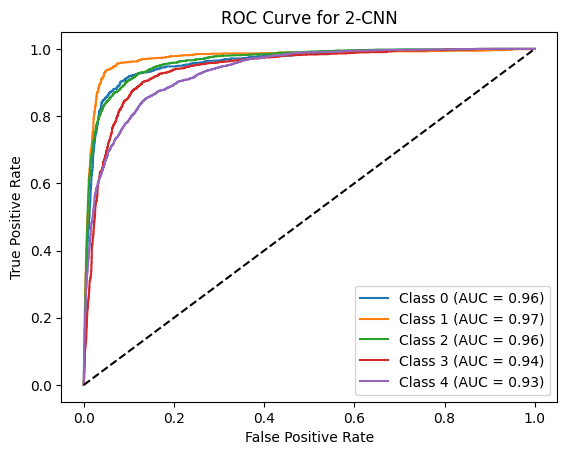

In [ ]:
# ROC curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], cnn_model2.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for 2-CNN")
plt.legend()
plt.show()

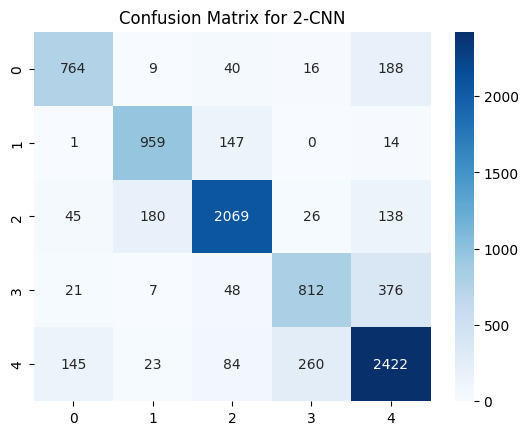

In [ ]:
cm = confusion_matrix(y_test, y_pred_cnn2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for 2-CNN")
plt.show()

## GRU Model

In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
gru_model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

In [ ]:
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_gru = gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 162s 290ms/step - accuracy: 0.6384 - loss: 233689472.0000 - val_accuracy: 0.7457 - val_loss: 0.6815
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 159s 289ms/step - accuracy: 0.7928 - loss: 0.5597 - val_accuracy: 0.7559 - val_loss: 0.6514
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 159s 288ms/step - accuracy: 0.8126 - loss: 0.5054 - val_accuracy: 0.7593 - val_loss: 0.6423
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 159s 288ms/step - accuracy: 0.8249 - loss: 0.4640 - val_accuracy: 0.7606 - val_loss: 0.6464
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 158s 288ms/step - accuracy: 0.8351 - loss: 2.4699 - val_accuracy: 0.7613 - val_loss: 0.6473


In [ ]:
y_pred_gru = gru_model.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step


In [ ]:
gru_accuracy = accuracy_score(y_test, y_pred_gru)
gru_precision = precision_score(y_test, y_pred_gru, average='weighted')
gru_recall = recall_score(y_test, y_pred_gru, average='weighted')
gru_f1 = f1_score(y_test, y_pred_gru, average='weighted')
gru_log_loss = log_loss(y_test, gru_model.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step


In [ ]:
gru_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [gru_accuracy, gru_precision, gru_recall, gru_f1, gru_log_loss]
})

In [ ]:
gru_metrics_df

,Metric,Score
0,Accuracy,0.76
1,Precision,0.76
2,Recall,0.76
3,F1 Score,0.76
4,Log Loss,0.65


275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step


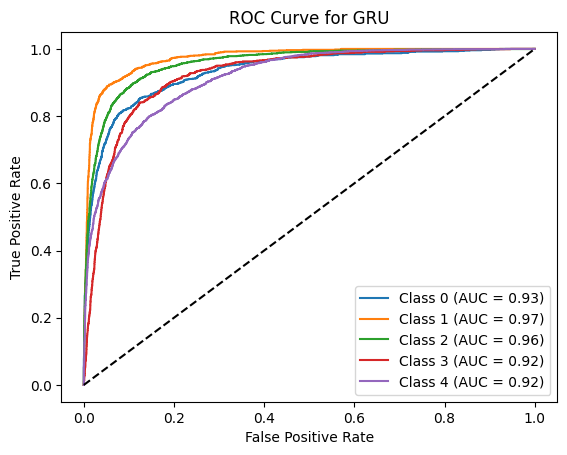

In [ ]:
# ROC curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], gru_model.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for GRU")
plt.legend()
plt.show()

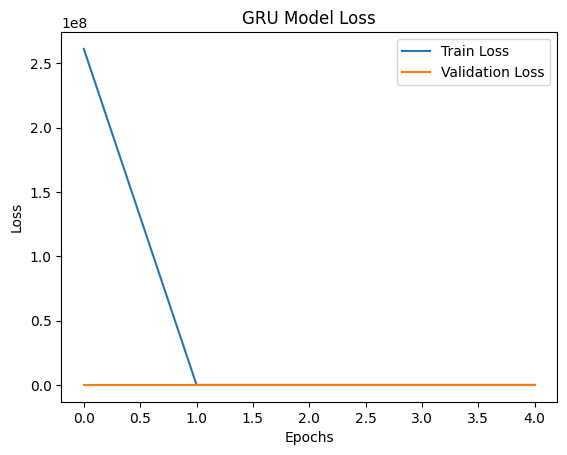

In [ ]:
# Loss grafiği
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

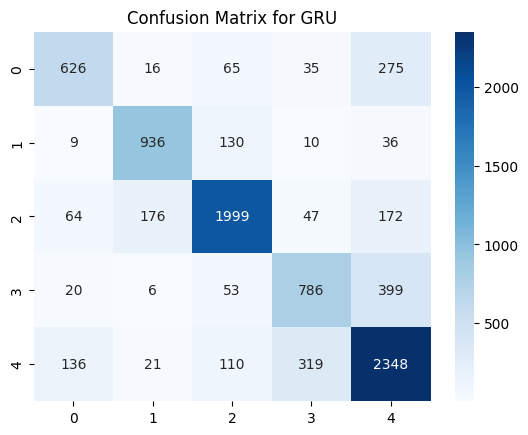

In [ ]:
cm = confusion_matrix(y_test, y_pred_gru)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for GRU")
plt.show()

## BiLSTM Model

In [ ]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
bilstm_model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
bilstm_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

In [ ]:
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_bilstm = bilstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 233s 416ms/step - accuracy: 0.6491 - loss: 0.8847 - val_accuracy: 0.8087 - val_loss: 0.4917
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 227s 413ms/step - accuracy: 0.8301 - loss: 0.4370 - val_accuracy: 0.8233 - val_loss: 0.4597
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 226s 412ms/step - accuracy: 0.8524 - loss: 0.3781 - val_accuracy: 0.8179 - val_loss: 0.4713
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 227s 412ms/step - accuracy: 0.8640 - loss: 0.3496 - val_accuracy: 0.8168 - val_loss: 0.4894
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 227s 413ms/step - accuracy: 0.8737 - loss: 0.3219 - val_accuracy: 0.8143 - val_loss: 0.5086


In [ ]:
y_pred_bilstm = bilstm_model.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


In [ ]:
bilstm_accuracy = accuracy_score(y_test, y_pred_bilstm)
bilstm_precision = precision_score(y_test, y_pred_bilstm, average='weighted')
bilstm_recall = recall_score(y_test, y_pred_bilstm, average='weighted')
bilstm_f1 = f1_score(y_test, y_pred_bilstm, average='weighted')
bilstm_log_loss = log_loss(y_test, bilstm_model.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step


In [ ]:
bilstm_metrisi_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [bilstm_accuracy, bilstm_precision, bilstm_recall, bilstm_f1, bilstm_log_loss]
})

In [ ]:
bilstm_metrisi_df

,Metric,Score
0,Accuracy,0.81
1,Precision,0.82
2,Recall,0.81
3,F1 Score,0.81
4,Log Loss,0.51


275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step


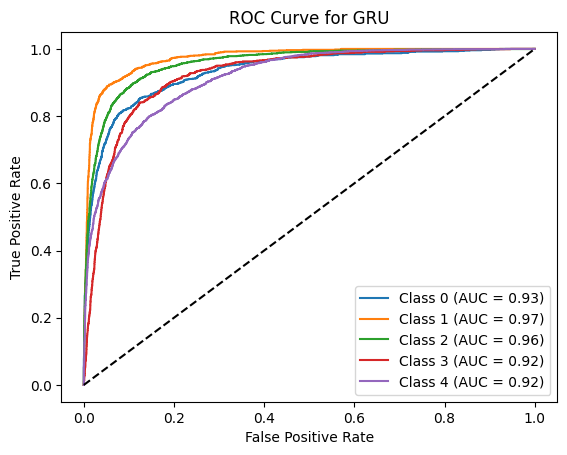

In [ ]:
# ROC curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], gru_model.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for GRU")
plt.legend()
plt.show()

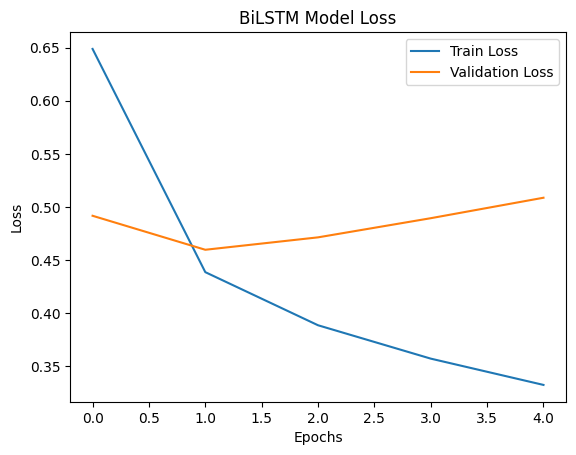

In [ ]:
# Loss grafiği
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

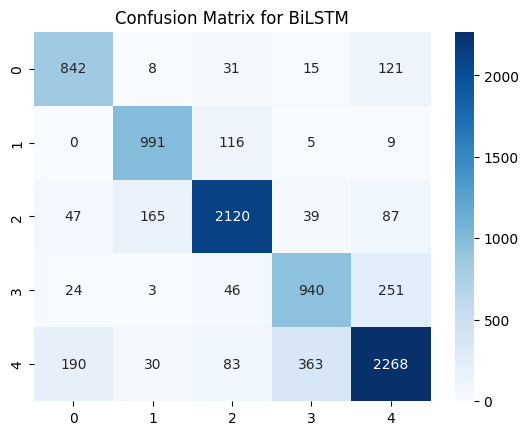

In [ ]:
cm = confusion_matrix(y_test, y_pred_bilstm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for BiLSTM")
plt.show()

## RNN Model

In [ ]:
# RNN Modeli
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
rnn_model.add(SimpleRNN(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

In [ ]:
# Modeli derleme
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitme
history_rnn = rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4737 - loss: 1.2629 - val_accuracy: 0.7510 - val_loss: 0.6481
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7505 - loss: 0.6635 - val_accuracy: 0.7791 - val_loss: 0.5889
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7726 - loss: 0.6050 - val_accuracy: 0.7561 - val_loss: 0.6443
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7880 - loss: 0.5712 - val_accuracy: 0.7941 - val_loss: 0.5570
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8181 - loss: 0.4862 - val_accuracy: 0.7930 - val_loss: 0.5604


In [ ]:
y_pred_rnn = rnn_model.predict(X_test_pad).argmax(axis=1)

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [ ]:
rnn_accuracy = accuracy_score(y_test, y_pred_rnn)
rnn_precision = precision_score(y_test, y_pred_rnn, average='weighted')
rnn_recall = recall_score(y_test, y_pred_rnn, average='weighted')
rnn_f1 = f1_score(y_test, y_pred_rnn, average='weighted')
rnn_log_loss = log_loss(y_test, rnn_model.predict(X_test_pad))

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
rnn_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Log Loss"],
    "Score": [rnn_accuracy, rnn_precision, rnn_recall, rnn_f1, rnn_log_loss]
})

In [ ]:
rnn_metrics_df

,Metric,Score
0,Accuracy,0.79
1,Precision,0.80
2,Recall,0.79
3,F1 Score,0.79
4,Log Loss,0.56


275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


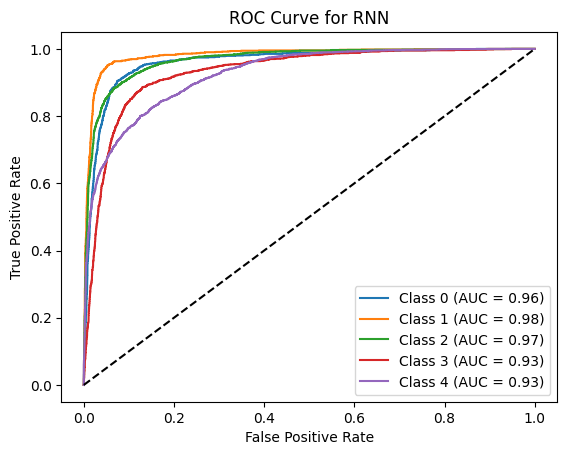

In [ ]:
# ROC curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(lb.transform(y_test)[:, i], rnn_model.predict(X_test_pad)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for RNN")
plt.legend()
plt.show()

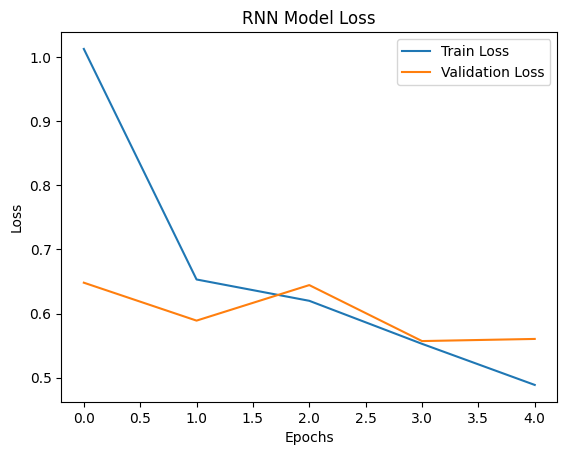

In [ ]:
# Loss grafiği
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

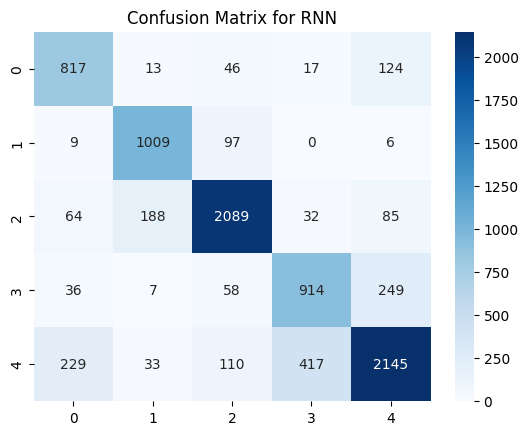

In [ ]:
cm = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for RNN")
plt.show()

In [ ]:
# Sonuçları Tabloya Ekleme
model_accuracies = {
    'Model': ['Logistic Regression', 'Random Forest', 'LSTM', 'CNN','CNN-low layered', 'GRU', 'BiLSTM','RNN'],
    'Accuracy': [log_reg_accuracy, rf_accuracy, lstm_accuracy, cnn_accuracy,cnn_accuracy_low_layered, gru_accuracy, bilstm_accuracy,rnn_accuracy]
}


In [ ]:
accuracy_df = pd.DataFrame(model_accuracies)
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.80
1,Random Forest,0.79
2,LSTM,0.79
3,CNN,0.56
4,CNN-low layered,0.80
5,GRU,0.76
6,BiLSTM,0.81
7,RNN,0.79


## BERT Transformers Model

In [14]:
import tensorflow as tf
import torch
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig, Adafactor
from transformers import get_linear_schedule_with_warmup
import datetime
import random
import time

In [15]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/386 [00:00<?, ?B/s]

In [16]:
data=df.copy()

In [ ]:
data.head()

,comments,ticket,cleaned_comments
0,ürünün paketlenmesini çok beğendim sağlam soru...,"Tavsiye Edilen, Kaliteli Ürünler",ürünün paketlenmesini beğendim sağlam sorunsuz...
1,"Tavsiye üzerine aldım , hediye aldım anneme , ...","Paketleme Iyi,Hizli Teslimat",tavsiye üzerine aldım hediye aldım anneme kull...
2,motorla boru kısmın birleştiği yer tam oturmuy...,Fiyat Performans,motorla boru kısmın birleştiği yer tam oturmuy...
3,Paketleme güzel baya özenle hazırlanmış:),"Paketleme Iyi,Hizli Teslimat",paketleme güzel baya özenle hazırlanmış
4,TORBASIZ DİYE KOSKOCA YAZIP TORBALI ÜRÜN YOLLA...,Iade Edilen,torbasiz koskoca yazip torbali ürün yollamak n...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43966 entries, 0 to 44006
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comments          43966 non-null  object
 1   ticket            43966 non-null  object
 2   cleaned_comments  43966 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [17]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: NVIDIA L4


In [ ]:
data.groupby('ticket').size()

,0
ticket,
Fiyat Performans,5231
Iade Edilen,5495
"Kalitesiz,Kusurlu, Kötü Paketleme",12385
"Paketleme Iyi,Hizli Teslimat",6002
"Tavsiye Edilen, Kaliteli Ürünler",14853


In [18]:
data['ticket'] = LabelEncoder().fit_transform(data['ticket'])

In [19]:
data['scraped_id'] = range(1, len(data) + 1)

In [ ]:
data.head()

,comments,ticket,cleaned_comments,scraped_id
0,ürünün paketlenmesini çok beğendim sağlam soru...,4,ürünün paketlenmesini beğendim sağlam sorunsuz...,1
1,"Tavsiye üzerine aldım , hediye aldım anneme , ...",3,tavsiye üzerine aldım hediye aldım anneme kull...,2
2,motorla boru kısmın birleştiği yer tam oturmuy...,0,motorla boru kısmın birleştiği yer tam oturmuy...,3
3,Paketleme güzel baya özenle hazırlanmış:),3,paketleme güzel baya özenle hazırlanmış,4
4,TORBASIZ DİYE KOSKOCA YAZIP TORBALI ÜRÜN YOLLA...,1,torbasiz koskoca yazip torbali ürün yollamak n...,5


In [ ]:
training = data.groupby('ticket').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([data,training]).drop_duplicates(keep=False)
result = test.groupby('cleaned_comments')['ticket'].count().sum()
print(data['scraped_id'].size - result)

35173


In [ ]:
training


comments  ticket                                   cleaned_comments  scraped_id
ticket                                                                                                                                
0      9103   8 adet aldım 3 tanesinin boyutu diğerlerine gö...       0  adet aldım tanesinin boyutu diğerlerine göre k...        9089
       7218                                         fiyata gore       0                                        fiyata gore        7208
       3922   Orta veriyorum çünkü 37 istedim 36 gönderdiler...       0  orta veriyorum istedim gönderdiler tamamıyla f...        3918
       3546   Fiyat performans ürünü belirli bir kullanımdan...       0  fiyat performans ürünü belirli bir kullanımdan...        3542
       9532                            fena değil fiyatına göre       0                           fena değil fiyatına göre        9518
...                                                         ...     ...                                                ...         ...
4      39680  Çok beğendim ben küçük sanıyordum ama büyük ve...       4  beğendim ben küçük sanıyordum büyük kaliteli d...       39643
       38399  Bayıldım bence çok ufak değil gayet şık durdu ...       4  bayıldım bence ufak değil gayet şık durdu keşk...       38364
       32624  Çok beğendim bu kadar kaliteli beklemiyordum a...       4     beğendim kadar kaliteli beklemiyordum açıkcası       32593
       29294       çok güzel kargo hızlıydı tam numara alınız..       4             güzel kargo hızlıydı tam numara alınız       29264
       34681  Küçük hediyeniz için teşekkür ederim. Ürün çok...       4  küçük hediyeniz teşekkür ederim ürün güzel fot...       34648

[35173 rows x 4 columns]

In [ ]:
test

,comments,ticket,cleaned_comments,scraped_id
2,motorla boru kısmın birleştiği yer tam oturmuy...,0,motorla boru kısmın birleştiği yer tam oturmuy...,3
11,Kulaklığım geldi bu fiyata göre başarılı bir ü...,0,kulaklığım geldi fiyata göre başarılı bir ürün...,12
13,Çok şık çok kullanışlı severek kullanıyorum ta...,4,şık kullanışlı severek kullanıyorum tavsiye ed...,14
17,kolay kolay yorum yapmam ama bu gerçekten çok ...,2,kolay kolay yorum yapmam gerçekten dandik cızı...,18
19,bozuk ürün geldi,2,bozuk ürün geldi,20
...,...,...,...,...
43976,Fiyat performans ürünü teşekkür ederim,0,fiyat performans ürünü teşekkür ederim,43936
43977,ürün fiyatına göre çok iyidi herhangi bir koku...,4,ürün fiyatına göre iyidi herhangi bir koku kıv...,43937
43981,"18 tane aldim, kalitesi asiri iyi ve gayet uyg...",4,tane aldim kalitesi asiri iyi gayet uygun cok ...,43941
43984,"Aynı göründüğü gibi geldi, hızlı kargo ve küçü...",4,aynı göründüğü geldi hızlı kargo küçük hediye ...,43944


In [ ]:
print("Training: ", len(training))
print("Test: ", len(test))

Training:  35173
Test:  8793


In [22]:
training_texts = training.cleaned_comments.values
training_labels = training.ticket.values

In [ ]:
training_labels

array([0, 0, 0, ..., 4, 4, 4])

In [23]:
input_ids = []
attention_masks = []
max_len = 200


for text in training_texts:
    encoded_dict = tokenizer.encode_plus(
                        str(text),
                        add_special_tokens = True,
                        max_length = max_len,
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_texts[0])
print('Token IDs:', input_ids[0])

Original:  fiyat performans ürünü kaliteli beklemeyin kötüde değil sadece plastiği mat olduğundan resimler bir tık matlaşıyor
Token IDs: tensor([     2,   2821,   5308, 124719,   4633,  42630,  36007,   1942,  10715,
          2577,  35504,  32014,   4805,  58421,  12180,   1947,   3947,   4805,
          7589,   2012,      3,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,

In [24]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

In [25]:
batch_size = 32

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

In [26]:
number_of_categories = len(data['ticket'].unique())

In [27]:
model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-uncased",
    num_labels = number_of_categories,
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

model.safetensors:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-128k-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [28]:
    epochs = 10

    optimizer = torch.optim.AdamW(model.parameters(), lr = 5e-5, eps=1e-8)


    total_steps = len(train_dataloader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps = 0,
                                                num_training_steps = total_steps)

In [29]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [30]:
seed_val = 3000

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        output = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

======== Epoch 1 / 10 ========
Batch    10  of  1,174.    Elapsed: 0:00:06.
Batch    20  of  1,174.    Elapsed: 0:00:11.
Batch    30  of  1,174.    Elapsed: 0:00:15.
Batch    40  of  1,174.    Elapsed: 0:00:20.
Batch    50  of  1,174.    Elapsed: 0:00:25.
Batch    60  of  1,174.    Elapsed: 0:00:29.
Batch    70  of  1,174.    Elapsed: 0:00:34.
Batch    80  of  1,174.    Elapsed: 0:00:39.
Batch    90  of  1,174.    Elapsed: 0:00:44.
Batch   100  of  1,174.    Elapsed: 0:00:48.
Batch   110  of  1,174.    Elapsed: 0:00:53.
Batch   120  of  1,174.    Elapsed: 0:00:58.
Batch   130  of  1,174.    Elapsed: 0:01:03.
Batch   140  of  1,174.    Elapsed: 0:01:08.
Batch   150  of  1,174.    Elapsed: 0:01:12.
Batch   160  of  1,174.    Elapsed: 0:01:17.
Batch   170  of  1,174.    Elapsed: 0:01:22.
Batch   180  of  1,174.    Elapsed: 0:01:27.
Batch   190  of  1,174.    Elapsed: 0:01:32.
Batch   200  of  1,174.    Elapsed: 0:01:37.
Batch   210  of  1,174.    Elapsed: 0:01:41.
Batch   220  of  1,174. 

In [ ]:
tokenizer.save_pretrained("./bigscience_t0_tokenizer")
model.save_pretrained("./bigscience_t0_model")

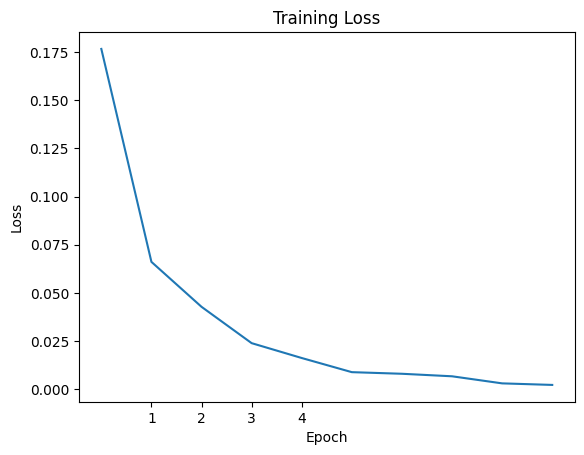

In [31]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [32]:
test_texts = test.cleaned_comments.values
test_labels = test.ticket.values

input_ids = []
attention_masks = []

for text in test_texts:
    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens = True,
                        max_length = max_len,
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [33]:
print('Prediction started on test data')
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

Prediction started on test data
Prediction completed


In [34]:
prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

In [35]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')
accr = accuracy_score(test_labels, prediction_scores)

In [36]:
print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accr)

F-Score:  0.9833769299716781
Recall:  0.9835787687189415
Precision:  0.9832709358400281
Accuracy:  0.9838125665601704


In [37]:
report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))

In [ ]:
data.head()

,comments,ticket,cleaned_comments,scraped_id
0,ürünün paketlenmesini çok beğendim sağlam soru...,4,ürünün paketlenmesini beğendim sağlam sorunsuz...,1
1,"Tavsiye üzerine aldım , hediye aldım anneme , ...",3,tavsiye üzerine aldım hediye aldım anneme kull...,2
2,motorla boru kısmın birleştiği yer tam oturmuy...,0,motorla boru kısmın birleştiği yer tam oturmuy...,3
3,Paketleme güzel baya özenle hazırlanmış:),3,paketleme güzel baya özenle hazırlanmış,4
4,TORBASIZ DİYE KOSKOCA YAZIP TORBALI ÜRÜN YOLLA...,1,torbasiz koskoca yazip torbali ürün yollamak n...,5


In [38]:
report = report.rename(columns={
                                '0':'Fiyat Performans',
                                '1':'Iade Edilen',
                                '2':'Kalitesiz,Kusurlu, Kötü Paketleme',
                                '3':'Paketleme Iyi,Hizli Teslimat',
                                '4':'Tavsiye Edilen, Kaliteli Ürünler'})

In [39]:
report

,Fiyat Performans,Iade Edilen,"Kalitesiz,Kusurlu, Kötü Paketleme","Paketleme Iyi,Hizli Teslimat","Tavsiye Edilen, Kaliteli Ürünler",accuracy,macro avg,weighted avg
precision,0.99,1.00,0.95,0.98,0.99,0.98,0.98,0.98
recall,0.98,1.00,0.98,0.98,0.99,0.98,0.98,0.98
f1-score,0.98,1.00,0.97,0.98,0.99,0.98,0.98,0.98
support,1746.00,1894.00,1663.00,2017.00,2070.00,0.98,9390.00,9390.00


In [ ]:
from transformers import BertTokenizer,BertTokenizerFast, TFBertForSequenceClassification, BertConfig, TFBertModel
config = BertConfig.from_json_file("./bigscience_t0_model/config.json")
model_path = "./bigscience_t0_model"
tokenizer_path = "./bigscience_t0_tokenizer"
#model = TFBertModel.from_pretrained(model_path, from_pt=True, config=config)
model = TFBertForSequenceClassification.from_pretrained(model_path, from_pt=True) # modify labels as needed

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
from transformers import TextClassificationPipeline

text = ["Bu ürün gerçekten harika!", "Paketleme kötü, kesinlikle tavsiye etmiyorum.","ürün bozuk çıktı iade edeceğim.","bu ürünü almayın. Bir tanesi bozuk geldi","ürün güzel ancak paketleme kötüydü.","Ürünü oldukça beğendim ama fiyat konusuna gelirsek çok pahalı"]

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
'0':'Fiyat Performans',
                                '1':'Iade Edilen',
                                '2':'Kalitesiz,Kusurlu, Kötü Paketleme',
                                '3':'Paketleme Iyi,Hizli Teslimat',
                                '4':'Tavsiye Edilen, Kaliteli Ürünler'

In [ ]:
[print(f"{text[index]} - {i['label']}") for index, i in enumerate(pipe(text))]

Bu ürün gerçekten harika! - LABEL_4
Paketleme kötü, kesinlikle tavsiye etmiyorum. - LABEL_2
ürün bozuk çıktı iade edeceğim. - LABEL_1
bu ürünü almayın. Bir tanesi bozuk geldi - LABEL_2
ürün güzel ancak paketleme kötüydü. - LABEL_2
Ürünü oldukça beğendim ama fiyat konusuna gelirsek çok pahalı - LABEL_4


[None, None, None, None, None, None]